In [21]:
import pandas as pd
import numpy as np
import nsepy 
import os
from datetime import datetime ,date
import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)
%matplotlib inline

In [2]:
database = "C:/Users/sanjo/PycharmProjects/mokshtech/stock_predictor/database/optionData"



In [3]:
def getMonthlyExpirtyDate():
    monthly_expirty_Date  =[]
    start_date = datetime.date(2016, 1, 1)
    end_date = datetime.date(2021, 4, 30)
    #delta = datetime.timedelta(days=1)
    delta = relativedelta(months=+1)
    while start_date <= end_date:
        #print(start_date.year,start_date.month)
        #print(str(max(nsepy.get_expiry_date(start_date.year,start_date.month))))
        
        monthly_expirty_Date.append(str(max(nsepy.get_expiry_date(start_date.year,start_date.month))))
        start_date += delta
    return monthly_expirty_Date

In [27]:
print(os.getcwd())
print(os.listdir())
symbol = 'BANKNIFTY'
banknifty = pd.DataFrame()
formatted_banknifyt_df = pd.DataFrame(['Year_month','P&L'])
month_profit_loss = pd.DataFrame()
start_date = datetime.date(2016, 1, 1)
end_date = datetime.date(2021, 4, 30)
delta = relativedelta(years=+1)
monthly_expirty_date = getMonthlyExpirtyDate()
year_month_list =[]
p_N_L_list =[]
cum_p_N_L_list =[]
slipage = 5
 
try:
    while start_date <= end_date:
        val =0
        print(str(symbol)+str(start_date.year)+".csv")
        filename = str(symbol)+str(start_date.year)+".csv"
        fname = os.path.join(database,filename)
        fname_day = os.path.join(database,filename)
        df = pd.read_csv(fname)
        df = df.loc[df['SYMBOL']== symbol]
        df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
        df['Year_month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
        df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m-%d')
        df['EXPIRY_DT_Year_month'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m')
        formatted_banknifyt_df = df[ df['Year_month'] == df['EXPIRY_DT_Year_month'] ]
        #print(formatted_banknifyt_df)
        # below row is to get only montly expirty date colums from data frame
        formatted_banknifyt_df= formatted_banknifyt_df[ formatted_banknifyt_df['EXPIRY_DT'].isin(monthly_expirty_date)]
        formated_option_df_group = formatted_banknifyt_df.groupby('Year_month')
           
        for name , group in formated_option_df_group :
            #print(name)
            future_logic_df = group[group['INSTRUMENT']=='FUTIDX']
            future_logic_df = future_logic_df.iloc[[0]]
            strike_price = (future_logic_df['OPEN']- (future_logic_df['OPEN'])%100).astype(int).min()
            print("Strile price is ",strike_price)
            option_df = group[group['INSTRUMENT']=='OPTIDX']
            option_df = option_df[option_df['STRIKE_PR']==strike_price]
            month_option_df_ce = option_df[option_df['OPTION_TYP'].isin(['CE'])]
            month_option_df_pe = option_df[option_df['OPTION_TYP'].isin(['PE'] )]                                                              
            month_option_df_ce = month_option_df_ce.iloc[[0,-1]]
            month_option_df_pe = month_option_df_pe.iloc[[0,-1]]
            month_option_df_ce_buy = month_option_df_ce.iloc[[0]]['OPEN'].min()
            month_option_df_ce_sell =month_option_df_ce.iloc[[-1]]['CLOSE'].min()
            month_option_df_pe_buy = month_option_df_pe.iloc[[0]]['OPEN'].min()
            month_option_df_pe_sell =month_option_df_pe.iloc[[-1]]['CLOSE'].min()
            print(month_option_df_ce_sell,month_option_df_ce_buy,month_option_df_pe_sell,month_option_df_pe_buy)
            pandl = (month_option_df_ce_sell-month_option_df_ce_buy)+ (month_option_df_pe_sell-month_option_df_pe_buy)
            print("pandl",pandl,abs(pandl*slipage/100))
            pandl = pandl - abs(pandl*slipage/100)
            print("pandl",pandl)
            if cum_p_N_L_list:
                print("inlistelse ",val)
                val = cum_p_N_L_list[-1]        
  
            p_N_L_list.append(pandl)
            cum_p_N_L_list.append(val+pandl)   
            year_month_list.append(name)
   
        banknifty= banknifty.append(formatted_banknifyt_df)
        print("r",fname)
        start_date += delta
       
    #print(year_month_list)
    print(p_N_L_list)
    print(cum_p_N_L_list)
    month_profit_loss['Year_month'] = year_month_list
    month_profit_loss['P&L'] = p_N_L_list
    month_profit_loss['cum_P&L'] = cum_p_N_L_list
    #print(month_profit_loss.head) 
except Exception as error:
    print("File not found {0}".format(error))


C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying.ipynb', 'NIFTY.csv', 'preDefinedStrategies', 'straddle.py', 'strategies.py', '__init__.py']
BANKNIFTY2016.csv
Strile price is  16900
0.05 352.75 1501.85 300.0
pandl 849.1499999999999 42.45749999999999
pandl 806.6924999999999
Strile price is  15500
0.05 385.75 1925.6 340.95
pandl 1198.9499999999998 59.94749999999999
pandl 1139.0024999999998
inlistelse  0
Strile price is  14100
2037.9 396.0 0.05 394.3
pandl 1247.65 62.3825
pandl 1185.2675000000002
inlistelse  806.6924999999999
Strile price is  16200
506.15 400.0 0.1 417.0
pandl -310.75 15.5375
pandl -326.2875
inlistelse  1945.6949999999997
Strile price is  16700
627.9 407.1 0.05 374.9
pandl -154.05 7.7025
pandl -161.7525
inlistelse  3130.9624999999996
Strile price is  17600
304.5 390.05 0.1 405.0
pandl -490.45 24.5225
pandl -514.9725
inlistelse  2804.67499999

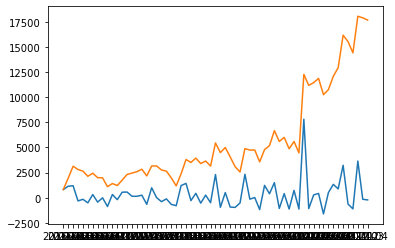

In [28]:
plt.plot(month_profit_loss['Year_month'], month_profit_loss['P&L'],month_profit_loss['cum_P&L'])
plt.show()
#print(month_profit_loss)
#print(month_profit_loss.sum())


## this is to exprint using nsepy for monthy option buying

def getExpirtyDate():
    expirty_Date  =[]
    start_date = datetime.date(2017, 1, 1)
    end_date = datetime.date(2021, 4, 30)
    delta = relativedelta(months=+1)
    while start_date <= end_date: 
        #print(sorted(list(nsepy.get_expiry_date(start_date.year,start_date.month))),"")
        expirty_Date.extend(sorted(list(nsepy.get_expiry_date(start_date.year,start_date.month))))
        start_date += delta
    return expirty_Date
    
    
    



symbol = 'NIFTY'
expiry_list = getExpirtyDate()

print(expiry_list)

previous_expiry_date = expiry_list[200]
current_expiry_date = expiry_list[203]

print(previous_expiry_date)
print(current_expiry_date)
#identiy next working day after previous expiry day
start_date = previous_expiry_date+timedelta(days =1)
print(start_date)

nifty_fut = nsepy.get_history(symbol="NIFTY",
                        start=start_date,
                        end=start_date,
                        index=True,
                        futures=True,
                        expiry_date=current_expiry_date)

nifty_fut1 = nsepy.get_history(symbol="NIFTY",
                        start=date(2015,1,1),
                        end=date(2015,1,10),
                        index=True,
                        futures=True,
                        expiry_date=date(2015,1,29))

print(nifty_fut)
